In [ ]:
import os
import random
from io import BytesIO
from pathlib import Path

import matplotlib.pyplot as plt
from cairosvg import svg2png
from datasets import load_dataset, load_from_disk
from PIL import Image

scope = Path().resolve()
print(scope)

os.chdir("..")

scope = Path().resolve()
print(scope)


/mnt/c/Users/ankit/Desktop/Portfolio/kaggle/drawing-wit-llms/dataset
/mnt/c/Users/ankit/Desktop/Portfolio/kaggle/drawing-wit-llms


In [ ]:
# from datasets import load_dataset

# ds = load_dataset("starvector/text2svg-stack")
# ds.save_to_disk('dataset/text2svg_dataset')

Saving the dataset (1/1 shards): 100%|██████████| 5709/5709 [00:00<00:00, 23527.78 examples/s]


In [ ]:
# load temporarily by downloading from hugginface estimate time ~ 3 min
# ds = load_dataset("starvector/text2svg-stack")
ds = load_from_disk("dataset/text2svg_dataset")

In [ ]:
def svg2pil(svg):
    try:
        res = Image.open(BytesIO(svg2png(svg)))
    except Exception:
        default_svg = """<svg width="256" height="256" viewBox="0 0 256 256"><circle cx="50" cy="50" r="40" fill="red" /></svg>"""
        res = Image.open(BytesIO(svg2png(default_svg)))
    return res

Visualize the text2img-stack dataset from huggingface 

- randomly select 90 svgs and displat them

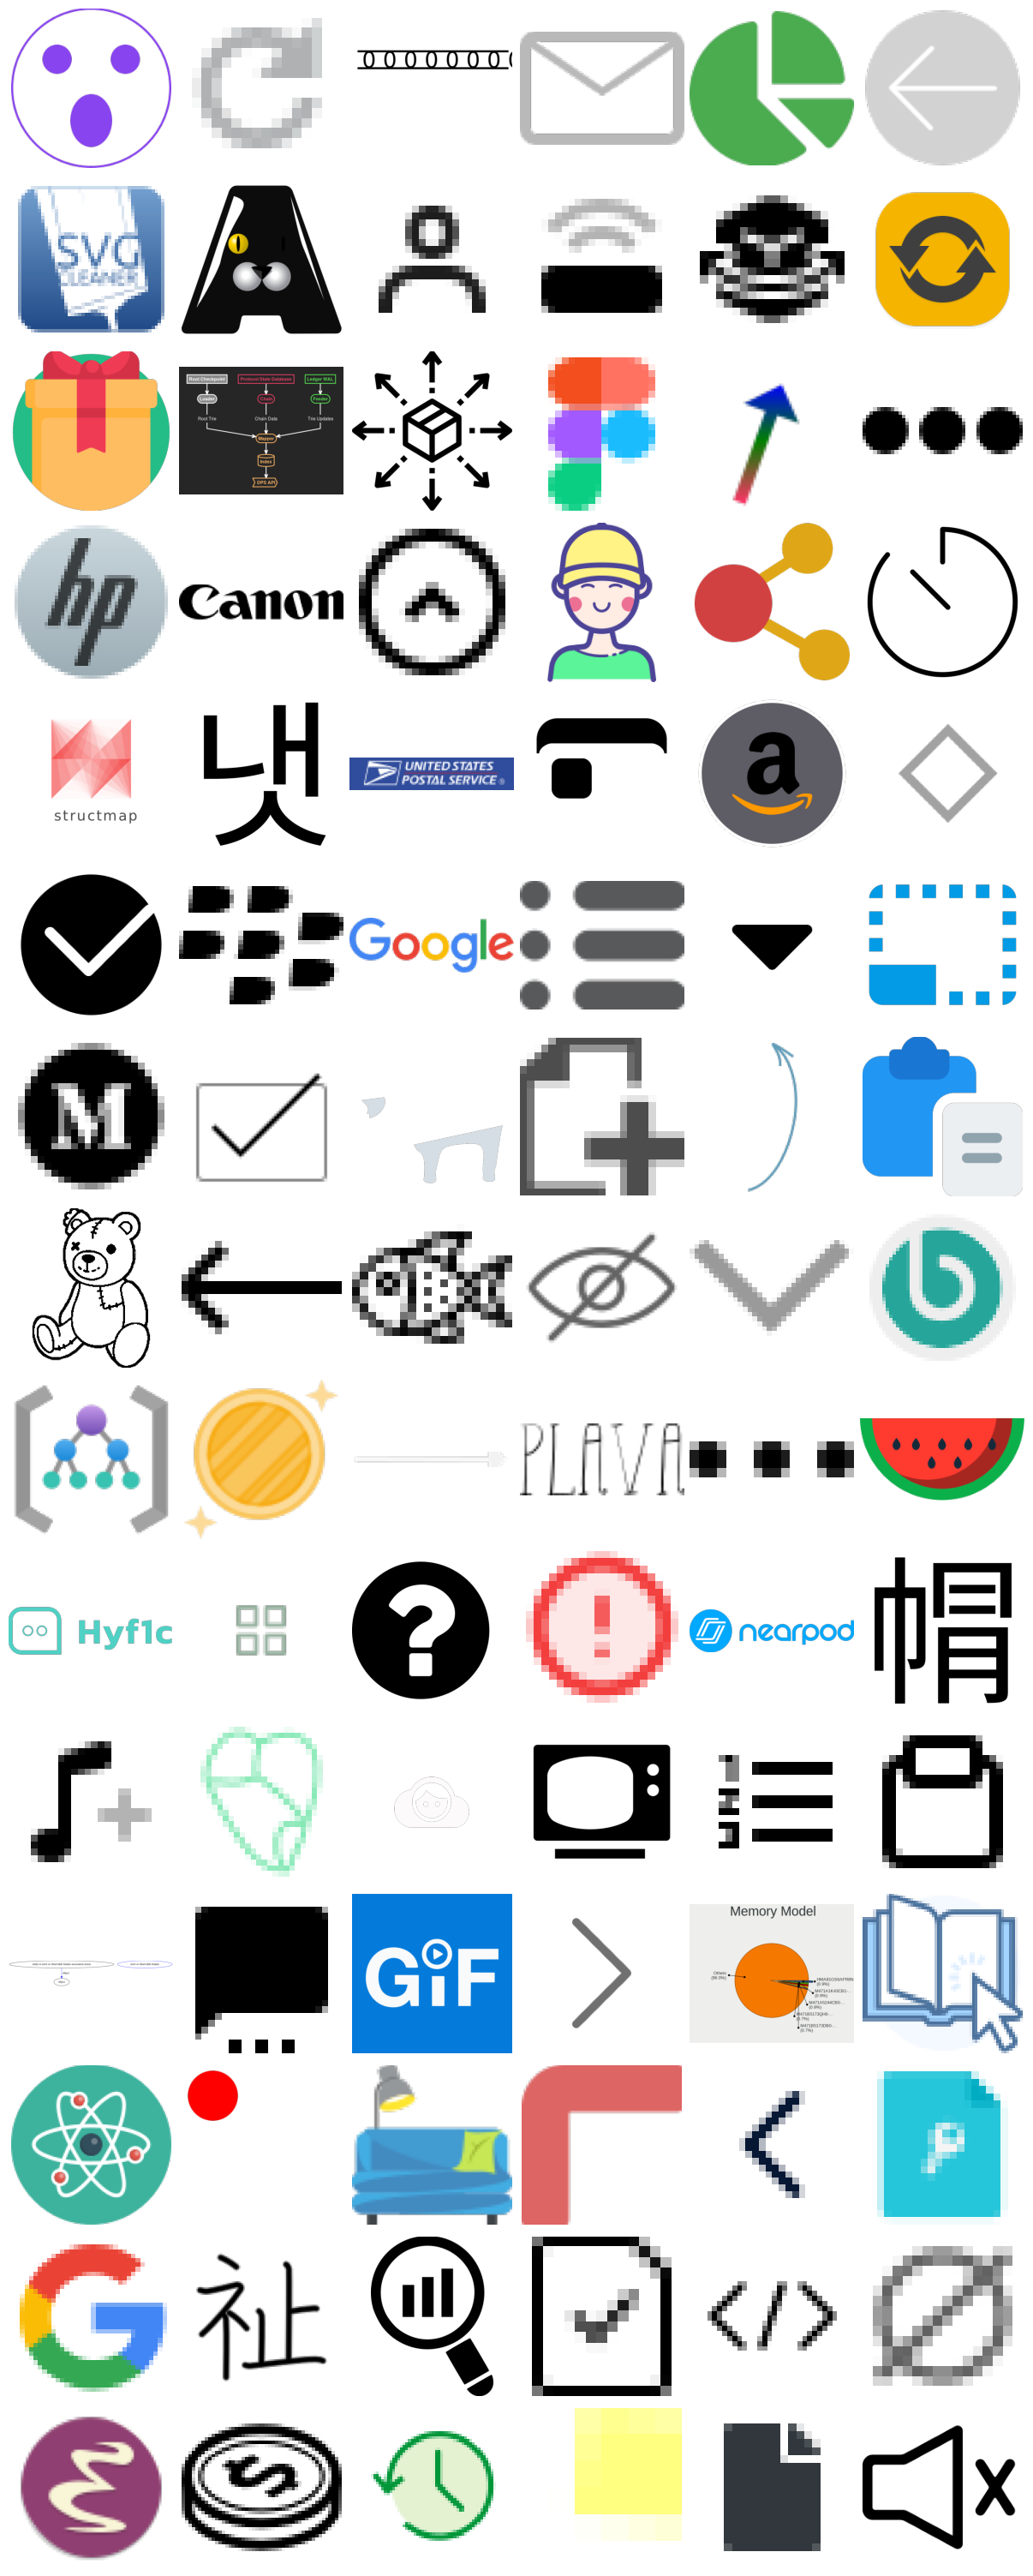

In [ ]:
start = 0
end = 2000000  # 2M
subset = ds["train"].select([random.randint(start, end) for _ in range(90)])

rows = 15
cols = 6

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))


for idx, data in enumerate(subset):
    r = int(idx / cols)
    c = int(idx % cols)
    ax = axes[r, c]
    image_index = r * cols + c

    ax.imshow(svg2pil(data["Svg"]))
    ax.axis("off")


plt.tight_layout(pad=0.5, h_pad=1.0, w_pad=0.5)
plt.show()
